# 라이브러리

In [2]:
import pandas as pd
import numpy as np # 수식계산
from sklearn import model_selection #머신러닝
from sklearn import metrics
import tensorflow as tf
import matplotlib.pyplot as plt #시각화
%matplotlib inline
import seaborn as sns

In [3]:
## 시각화를 위한 폰트설정
# 한글 출력을 위한 글꼴 설정
plt.rcParams['font.family'] = "NanumGothic"
print(plt.rcParams['font.family'])

# 문자 - (마이너스) 정상 출력을 위한 코드
plt.rcParams['axes.unicode_minus'] = False

sns.set(font='NanumGothic', 
        rc={"axes.unicode_minus":False},
        style='darkgrid')

['NanumGothic']


# 데이터 로드

In [4]:
df = pd.read_csv('C:/Users/s/Desktop/ICT기업인턴프로그램/실무교육/bank.csv', header=0)
df = df.dropna() # 결측값 제거 
print(df.shape)
print(list(df.columns))

(45211, 17)
['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']


In [5]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 6.2+ MB


> object type의 변수들이 다수 

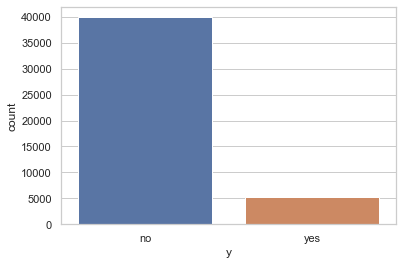

In [7]:
# 정기예금 가입자, 미가입자 분포 확인
sns.set(style='whitegrid')
sns.countplot(x='y',data=df)
plt.show()

# EDA(Exploratory Data Analysis)

## 더미 변수로 전환

In [8]:
# 범주형 변수를 더미 변수로 전환
df2 = pd.get_dummies(df,columns=['job','marital','default','housing','loan','education','contact','poutcome', 'month','y'])

In [9]:
print(df2.shape)

(45211, 53)


In [10]:
df2.head()

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,y_no,y_yes
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,33,2,5,76,1,-1,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
3,47,1506,5,92,1,-1,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


## 필요없는 컬럼 drop

In [11]:
df2.drop('default_no', axis=1, inplace=True)
df2.rename({'default_yes':'default'}, axis=1, inplace=True) # 1=yes, 0=no
df2.drop('housing_no', axis=1, inplace=True)
df2.rename({'housing_yes':'housing'}, axis=1, inplace=True) # 1=yes, 0=no
df2.drop('loan_no', axis=1, inplace=True)
df2.rename({'loan_yes':'loan'}, axis=1, inplace=True) # 1=yes, 0=no
df2.drop('y_no', axis=1, inplace=True)
df2.rename({'y_yes':'yes'}, axis=1, inplace=True) # 1=yes, 0=no

df2

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,yes
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,33,2,5,76,1,-1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,47,1506,5,92,1,-1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
45207,71,1729,17,456,2,-1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
45208,72,5715,17,1127,5,184,3,0,0,0,...,0,0,0,0,0,0,1,0,0,1
45209,57,668,17,508,4,-1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


## 상관 분석(Correlation Analysis)

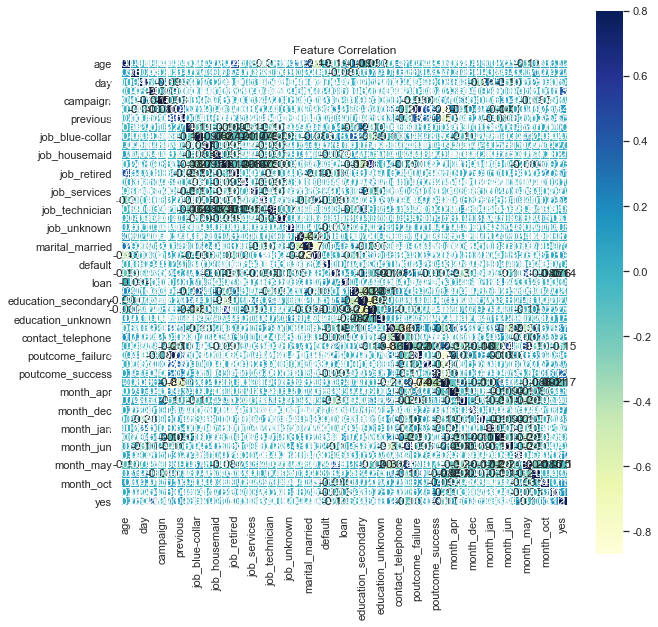

In [12]:
corr = df2.corr()
plt.figure(figsize=(10, 10));
sns.heatmap(corr,
            vmax=0.8,
            linewidths=0.01,
            square=True,
            annot=True,
            cmap='YlGnBu');
plt.title('Feature Correlation');

## 정기예금 가입여부와 유의미한 Feature들만을 남기는 Feature Selection

In [13]:
corr_yes_list1 = corr.query("yes > 0.3 or yes < -0.3").index.values.tolist()
corr_yes_list1.remove('yes')
print(corr_yes_list1)

corr_yes_list2 = corr.query("yes > 0.1 or yes < -0.1").index.values.tolist()
corr_yes_list2.remove('yes')
print(corr_yes_list2)

['duration', 'poutcome_success']
['duration', 'pdays', 'housing', 'contact_cellular', 'contact_unknown', 'poutcome_success', 'poutcome_unknown', 'month_mar', 'month_may', 'month_oct', 'month_sep']


In [14]:
# 정기예금 가입여부와 유의미한 상관관계가 존재하는 feature들로만 이루어진 dataframe 생성
d1 = df2[['duration', 'poutcome_success', 'yes']]
d2 = df2[['duration', 'pdays', 'housing', 'contact_cellular', 'contact_unknown', 'poutcome_success', 'poutcome_unknown', 'month_mar', 'month_may', 'month_oct', 'month_sep','yes']]
print(d1.shape)
print(d2.shape)

(45211, 3)
(45211, 12)


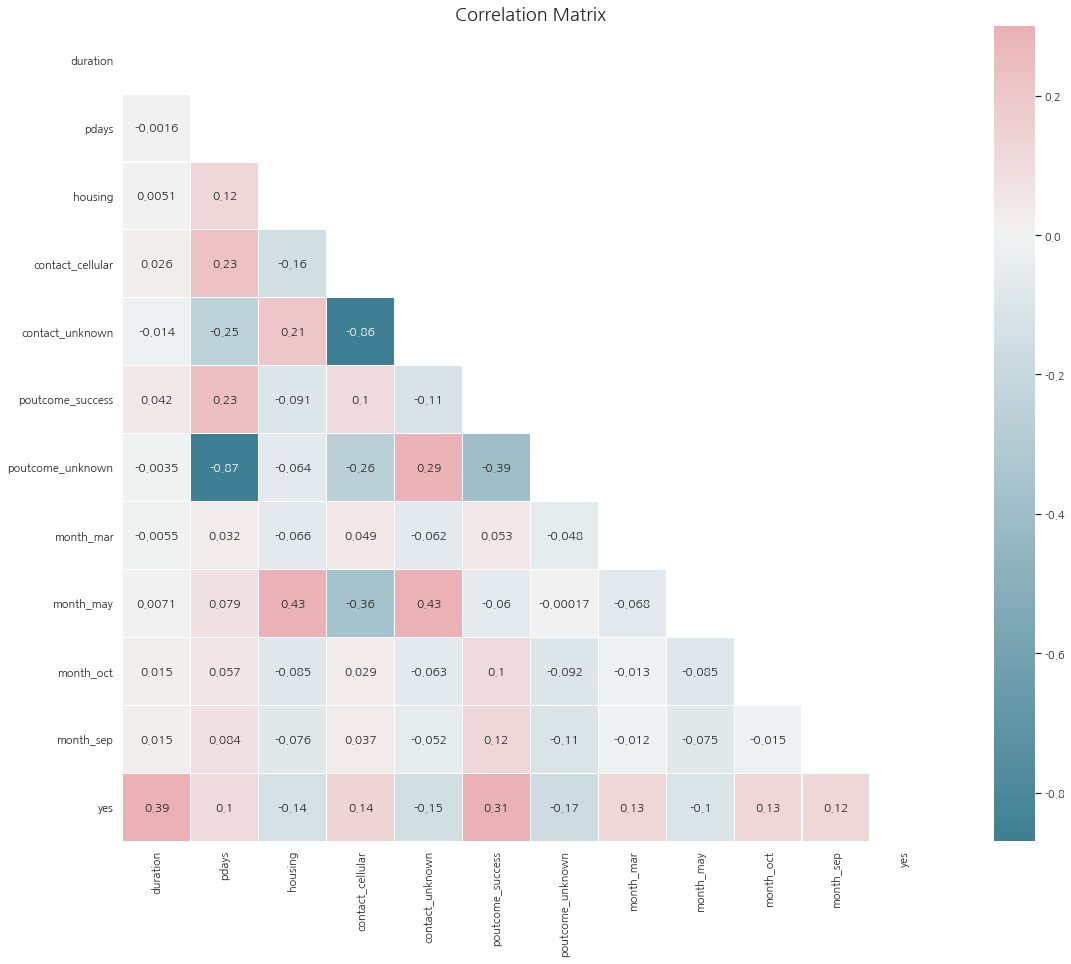

In [15]:
# 유의미한 feature들로만 간추려진 데이터를 시각화
sns.set(style="white", font='NanumGothic')
corr2 = d2.corr()
mask = np.triu(np.ones_like(corr2, dtype=np.bool))
f, ax = plt.subplots(figsize=(20, 15))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
plt.title('Correlation Matrix', fontsize=18)
sns.heatmap(corr2, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, annot=True)
plt.show()

## Regression plot

In [16]:
list2 = d2.columns.to_list()
list2.remove('yes')
list2

['duration',
 'pdays',
 'housing',
 'contact_cellular',
 'contact_unknown',
 'poutcome_success',
 'poutcome_unknown',
 'month_mar',
 'month_may',
 'month_oct',
 'month_sep']

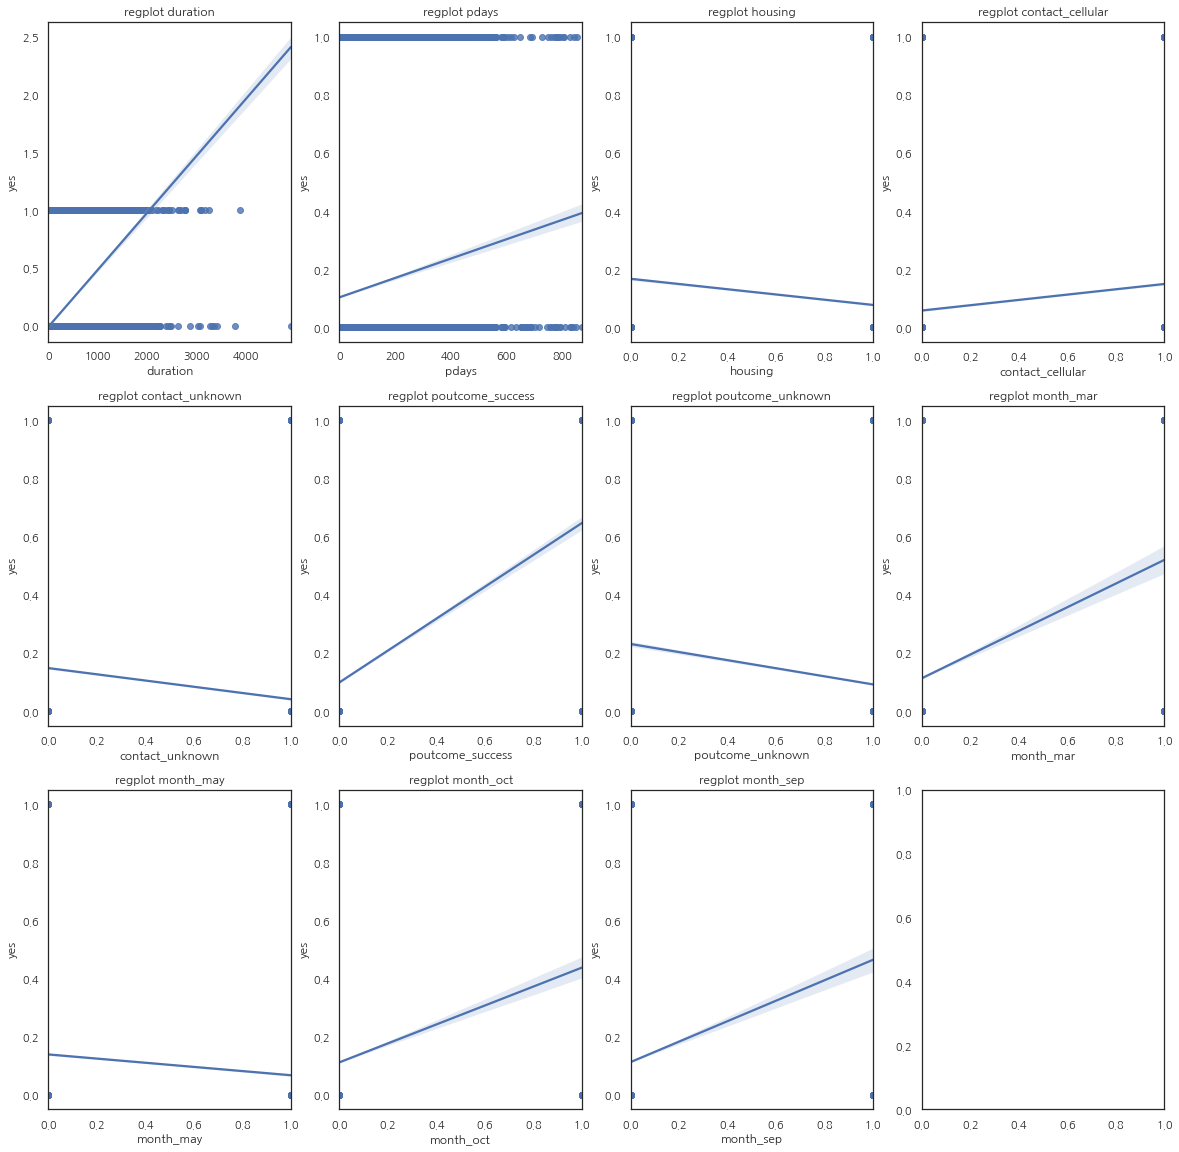

In [17]:
# 정기예금 가입 여부와 주요 feature들 간의 관계를 regression plot을 통해 시각화
figure, ax_list = plt.subplots(nrows=3, ncols=4)
figure.set_size_inches(20,20)

for i in range(len(list2)): 
    sns.regplot(data=d2, x=list2[i], y='yes', ax=ax_list[int(i/4)][int(i%4)]) 
    ax_list[int(i/4)][int(i%4)].set_title("regplot " + list2[i])

# 모델링

## 예측 모델 1

In [18]:
d1.shape

(45211, 3)

In [19]:
d1

,duration,poutcome_success,yes
0,261,0,0
1,151,0,0
2,76,0,0
3,92,0,0
4,198,0,0
...,...,...,...
45206,977,0,1
45207,456,0,1
45208,1127,1,1
45209,508,0,0


In [21]:
x_train = d1.iloc[0:31500, 0:2].values
y_train = d1.iloc[0:31500, [-1]].values

x_train = np.array(x_train, dtype=np.float32)
y_train = np.array(y_train, dtype=np.float32)
print(x_train.shape, y_train.shape)

x_test = d1.iloc[31500:45211, 0:2].values
y_test = d1.iloc[31500:45211, [-1]].values

x_test = np.array(x_test, dtype=np.float32)
y_test = np.array(y_test, dtype=np.float32)

(31500, 2) (31500, 1)


In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [75]:
# dataset parameters
nb_classes  = y_train.shape[1] # 종속변수의 개수
nb_features = x_train.shape[1] # 독립변수의 개수
print(nb_classes, nb_features)

n_train = x_train.shape[0]
n_test  = x_test.shape[0]
print(n_train, n_test)

# training HyperParameters
learning_rate  = 0.01
training_steps = 5001
display_step   = 500

# network hyperparameters
n_hidden1 = 2 # 1st layer number of neurons
n_output1 = 1

1 2
31500 13711


In [76]:
# define weights as a dictionary
tf.random.set_seed(2021)

weights = {

    'h1'  : tf.Variable(tf.initializers.GlorotNormal()((nb_features, n_hidden1))),
    'out' : tf.Variable(tf.initializers.GlorotNormal()((n_hidden1, n_output1))) #xavier_initializer_())
}
biases = {
    'b1'  : tf.Variable(tf.random.normal([n_hidden1], stddev=0.1)),
    'out' : tf.Variable(tf.random.normal([n_output1], stddev=0.1))
}

In [77]:
# define network architecture
def build_model(X):    
    hidden = tf.add(tf.matmul(X, weights['h1']), biases['b1']) # 첫번째 hidden layer
    hidden = tf.nn.relu(hidden) # tf.nn.sigmoid(hidden)
    
    output = tf.add(tf.matmul(hidden, weights['out']), biases['out']) 
    # 첫번째 hidden layer에서 output으로 연결되는 부분: Weight의 'out' + 상수항(bias의 'out')
    return tf.nn.sigmoid(output) # 출력 나가는 값: 0과 1로 transform된 값으로 나가야함(sigmoid쓴 이유)
    # 0,1,2로 나가면 softmax 활용하면됨
    
# cost function : cross-entropy
def cost(H, Y):
    return -tf.reduce_mean(Y*tf.math.log(H) + (1-Y)*tf.math.log(1-H))

# Accuracy
def accuracy(X, Y):
    hypo = build_model(X)
    predicted = tf.cast(hypo > 0.5, dtype=tf.float32)
    return tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

In [78]:
# stochastic gradient descent algorithm to minimize cost funtion
optimizer = tf.optimizers.SGD(learning_rate)

# training process
loss_record = []
def train(X, Y):
    # wrap computation inside a GradientTape for automactic differentiation
    with tf.GradientTape() as g:
        pred = build_model(X)  # make prediction
        loss = cost(pred, Y)  # calculate loss
        loss_record.append(loss.numpy())
        #print('loss = ',loss.numpy())

    # calculate gradients
    #gradients = g.gradient(loss, [W, b]) # dloss/dW, dloss/db
    #optimizer.apply_gradients(zip(gradients, [W, b])) # W : W - a*dcost/dW
        
    # Variables to update, i.e. trainable variables.
    trainable_variables = list(weights.values()) + list(biases.values())

    # Compute gradients.
    gradients = g.gradient(loss, trainable_variables)
    
    # Update W and b following gradients.
    optimizer.apply_gradients(zip(gradients, trainable_variables))

In [79]:
for step in range(training_steps):
    
    train(x_train, y_train)
    
    if step % display_step == 0:
        pred = build_model(x_train)
        loss = cost(pred, y_train) 
        acc  = accuracy(x_train, y_train)
        print("%s \t cost = %s \t accuracy = %f" % (step, loss.numpy(), acc.numpy()))

0 	 cost = 0.63035315 	 accuracy = 0.942032
500 	 cost = 0.2630635 	 accuracy = 0.942032
1000 	 cost = 0.23129962 	 accuracy = 0.942032
1500 	 cost = 0.22767611 	 accuracy = 0.942032
2000 	 cost = 0.22695494 	 accuracy = 0.942032
2500 	 cost = 0.22659518 	 accuracy = 0.942032
3000 	 cost = 0.22629319 	 accuracy = 0.942032
3500 	 cost = 0.22600932 	 accuracy = 0.942032
4000 	 cost = 0.22573753 	 accuracy = 0.942032
4500 	 cost = 0.22547624 	 accuracy = 0.942032
5000 	 cost = 0.22522464 	 accuracy = 0.942032


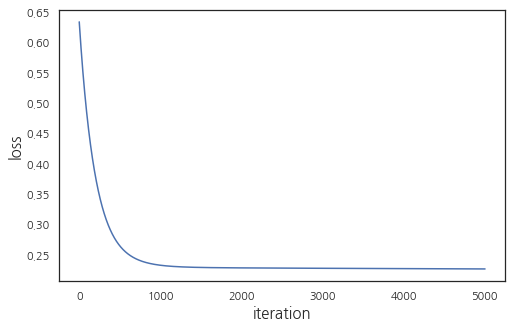

In [80]:
plt.figure(figsize = (8,5))
plt.plot(loss_record)
plt.xlabel('iteration', fontsize = 15)
plt.ylabel('loss', fontsize = 15)
plt.show()

In [81]:
acc = accuracy(x_train, y_train).numpy()
print("Accuracy: %s" % (acc*100))

Accuracy: 94.2031741142273


In [83]:
for step in range(training_steps):
    
    train(x_test, y_test)
    
    if step % display_step == 0:
        pred = build_model(x_test)
        loss = cost(pred, y_test) 
        acc  = accuracy(x_test, y_test)
        print("%s \t cost = %s \t accuracy = %f" % (step, loss.numpy(), acc.numpy()))

0 	 cost = 0.7967461 	 accuracy = 0.747429
500 	 cost = 0.5777072 	 accuracy = 0.747429
1000 	 cost = 0.56875116 	 accuracy = 0.747429
1500 	 cost = 0.5674131 	 accuracy = 0.747429
2000 	 cost = 0.5666633 	 accuracy = 0.747429
2500 	 cost = 0.5661153 	 accuracy = 0.747429
3000 	 cost = 0.56568474 	 accuracy = 0.747429
3500 	 cost = 0.56531566 	 accuracy = 0.747429
4000 	 cost = 0.56496054 	 accuracy = 0.747429
4500 	 cost = 0.5645732 	 accuracy = 0.747429
5000 	 cost = 0.5641027 	 accuracy = 0.747429


## 의사결정나무 모델

In [217]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from IPython.display import Image
import pydotplus
import os

from sklearn.tree import DecisionTreeClassifier
import io
import pydot
from IPython.core.display import Image
from sklearn.tree import export_graphviz

In [218]:
x_train = d1.iloc[0:31500, 0:2].values
y_train = d1.iloc[0:31500, [-1]].values
#x_train.tail()
x_train = np.array(x_train, dtype=np.float32)
y_train = np.array(y_train, dtype=np.float32)
print(x_train.shape, y_train.shape)

x_test = d1.iloc[31500:45211, 0:2].values
y_test = d1.iloc[31500:45211, [-1]].values
#print(x_test.tail())
x_test = np.array(x_test, dtype=np.float32)
y_test = np.array(y_test, dtype=np.float32)

(31500, 2) (31500, 1)


In [273]:
# 의사결정나무 적합 및 학습데이터 예측
X = x_train
y = y_train

tree1 = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=1000).fit(X, y)

In [268]:
dt_clf = DecisionTreeClassifier()
dt_clf = dt_clf.fit(x_train, y_train)
dt_prediction = dt_clf.predict(x_test)

In [221]:
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz/bin/'

In [222]:
d1

,duration,poutcome_success,yes
0,261,0,0
1,151,0,0
2,76,0,0
3,92,0,0
4,198,0,0
...,...,...,...
45206,977,0,1
45207,456,0,1
45208,1127,1,1
45209,508,0,0


In [283]:
feature_names = d1.columns.tolist()
feature_names = feature_names[0:2]
target_name = np.array(['Yes', 'No'])

In [284]:
dt_dot_data = tree.export_graphviz(tree1, out_file = None,
                                  feature_names = feature_names,
                                  class_names = target_name,
                                  max_depth = 3,
                                  filled = True, rounded = True,
                                  special_characters = True)

In [285]:
dt_graph = pydotplus.graph_from_dot_data(dt_dot_data)

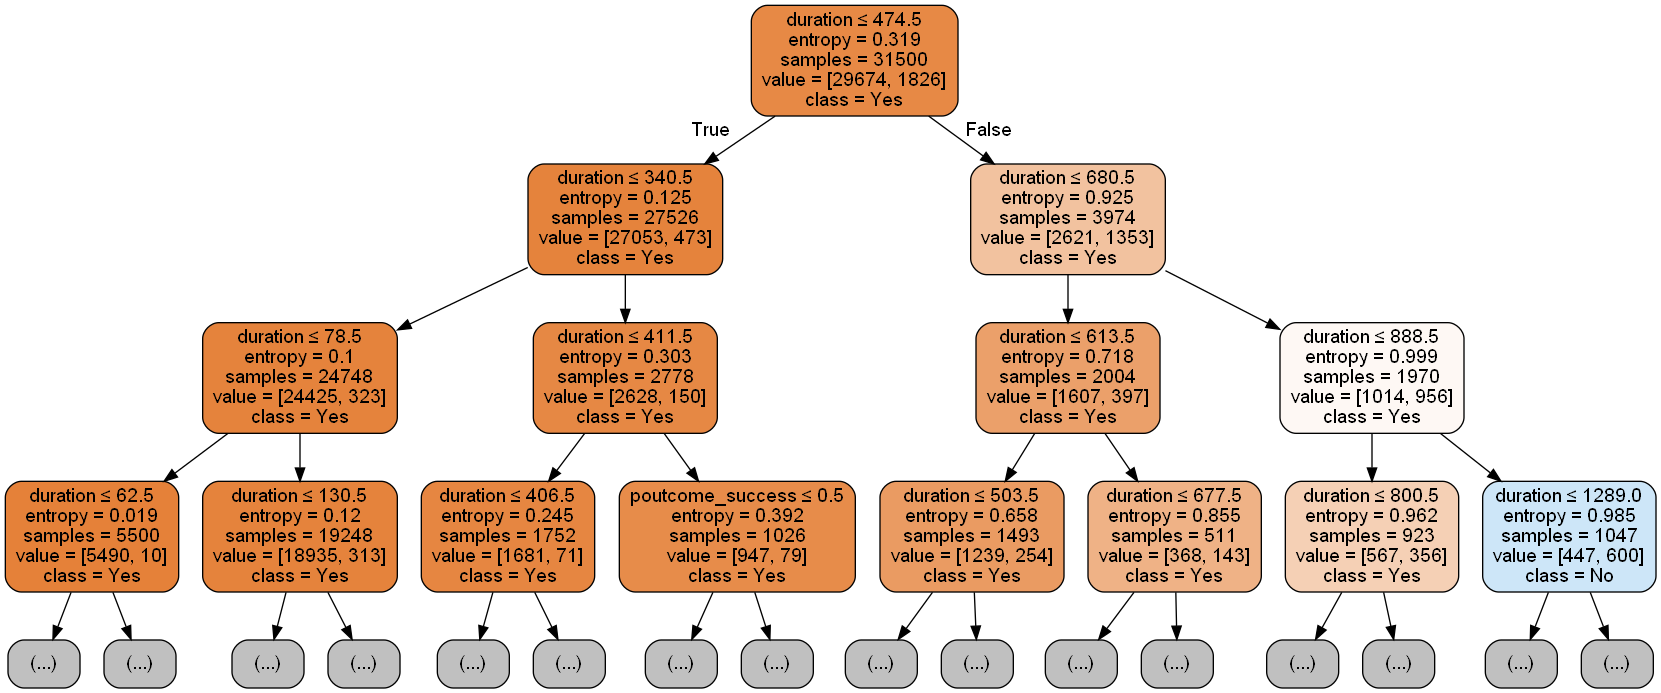

In [286]:
Image(dt_graph.create_png())

In [287]:
def draw_decision_tree(model):
    dot_buf = io.StringIO()
    export_graphviz(model, out_file=dot_buf, feature_names=feature_names)
    graph = pydot.graph_from_dot_data(dot_buf.getvalue())[0]
    image = graph.create_png()
    return Image(image)

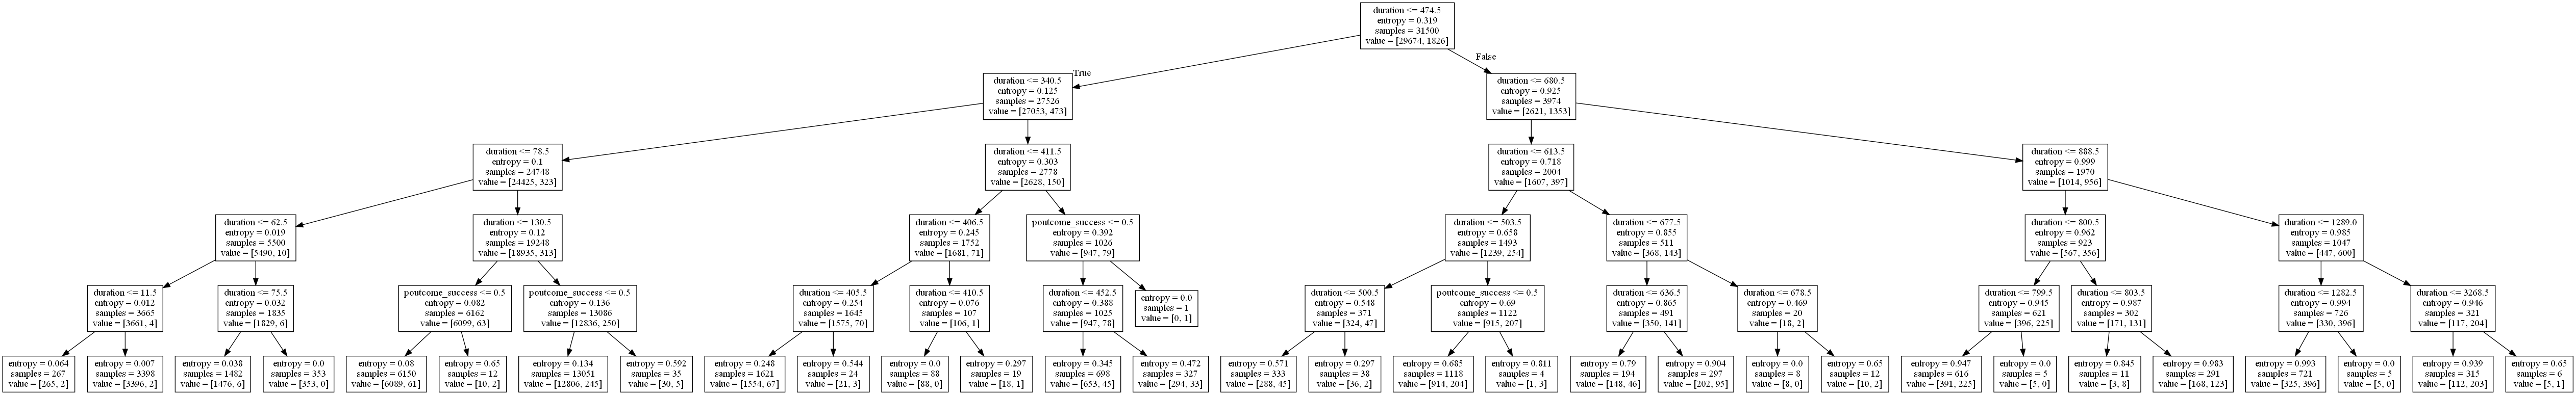

In [288]:
draw_decision_tree(tree1)

In [289]:
import matplotlib as mlp

def plot_decision_regions(X, y, model, title):
    resolution = 0.01
    markers = ('s', '^', 'o')
    colors = ('red', 'blue', 'lightgreen')
    cmap = mlp.colors.ListedColormap(colors)

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = model.predict(
        np.array([xx1.ravel(), xx2.ravel()]).T).reshape(xx1.shape)

    plt.contour(xx1, xx2, Z, cmap=mpl.colors.ListedColormap(['k']))
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8,
                    c=[cmap(idx)], marker=markers[idx], s=80, label=cl)

    plt.xlabel(data.feature_names[2])
    plt.ylabel(data.feature_names[3])
    plt.legend(loc='upper left')
    plt.title('정기예금 가입 여부 예측 모델')

    return Z

IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

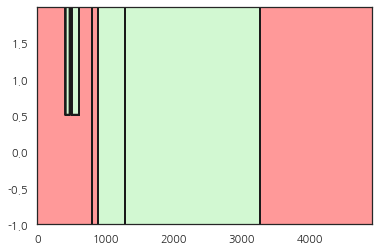

In [290]:
plot_decision_regions(x_train, y_train, tree1, '정기예금 가입 여부 예측 모델')

In [291]:
train_result = []
test_result = []
model_criterion = []
model_max_depth = []
parameter_min_leaf = []

insert_criterion = ['entropy']
max_depth = 5
list_min_leaf = [i for i in range(1,6)]
for i in insert_criterion:
    for n in list_min_leaf:
        tree2 = DecisionTreeClassifier(criterion=i, max_depth=max_depth, min_samples_leaf=n, random_state=1000)
        tree2.fit(x_train, y_train)
        train_result.append(tree2.score(x_train, y_train))
        test_result.append(tree2.score(x_test, y_test))
        model_criterion.append(i)
        model_max_depth.append(max_depth)
        parameter_min_leaf.append(n)

result = pd.DataFrame()
result['Criterion'] = model_criterion
result['Depth'] = max_depth
result['MinLeafSize'] = parameter_min_leaf
result['TrainAccuracy'] = train_result
result['TestAccuracy'] = test_result
result

,Criterion,Depth,MinLeafSize,TrainAccuracy,TestAccuracy
0,entropy,5,1,0.947429,0.763256
1,entropy,5,2,0.947397,0.760047
2,entropy,5,3,0.947397,0.760047
3,entropy,5,4,0.947397,0.760047
4,entropy,5,5,0.947333,0.756473


<AxesSubplot:xlabel='MinLeafSize', ylabel='value'>

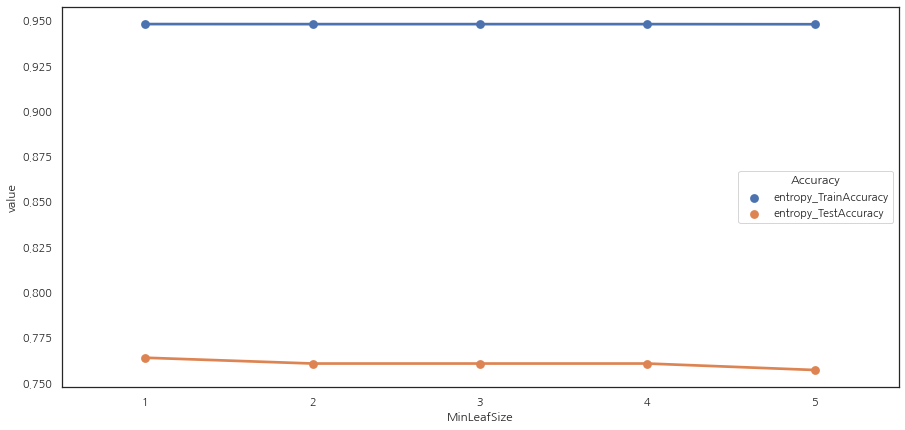

In [292]:
plt.figure(figsize=(15,7))
result_melt = pd.melt(result, id_vars=['Criterion', 'Depth', 'MinLeafSize'])
result_melt['Accuracy'] = result_melt['Criterion']+'_'+result_melt['variable']
sns.pointplot(data=result_melt, x='MinLeafSize', y='value', hue='Accuracy')